## Minimal example of OpenIE

First define the sentence you want to annotate

In [2]:
sentences = ['This property is defined by ComponentType defined in OPC UA DI.', 
            'The IMachineryItemVendorNameplateType is a subtype of the 2:IVendorNameplateType defined in OPC 10000-100.']

In [33]:
# Import the evaluators
from xpotato.graph_extractor.extract import GraphExtractor, FeatureEvaluator

In [9]:
evaluator = FeatureEvaluator()
extractor = GraphExtractor(cache_fn='openie_en')

In [11]:
# Parse the sentences to graphs
graphs = list(extractor.parse_iterable(sentences, graph_type='ud', lang='en'))

2022-03-08 14:20:00 INFO: Loading these models for language: en (English):
| Processor    | Package   |
----------------------------
| tokenize     | combined  |
| pos          | combined  |
| lemma        | combined  |
| depparse     | combined  |
| sentiment    | sstplus   |
| constituency | wsj       |
| ner          | ontonotes |

2022-03-08 14:20:00,550 : core (112) - INFO - Loading these models for language: en (English):
| Processor    | Package   |
----------------------------
| tokenize     | combined  |
| pos          | combined  |
| lemma        | combined  |
| depparse     | combined  |
| sentiment    | sstplus   |
| constituency | wsj       |
| ner          | ontonotes |

2022-03-08 14:20:00 INFO: Use device: cpu
2022-03-08 14:20:00,552 : core (123) - INFO - Use device: cpu
2022-03-08 14:20:00 INFO: Loading: tokenize
2022-03-08 14:20:00,553 : core (129) - INFO - Loading: tokenize
2022-03-08 14:20:00 INFO: Loading: pos
2022-03-08 14:20:00,562 : core (129) - INFO - Loading: 

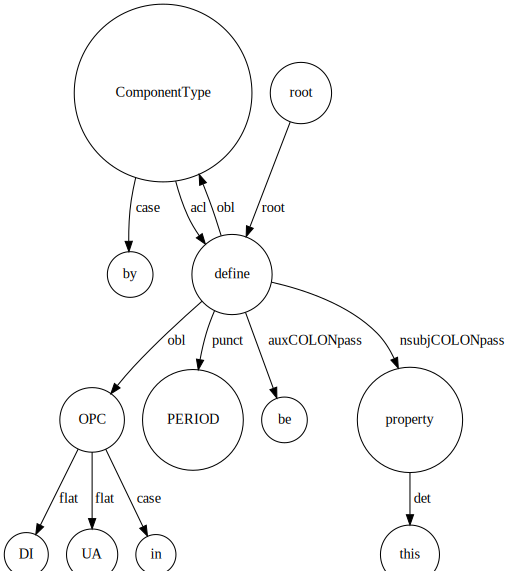

In [26]:
# We can also check any of the graphs
from xpotato.models.utils import to_dot
from graphviz import Source

Source(to_dot(graphs[0]))

In [27]:
# Define the featureset
feature1 = ['(u_0 / define :obl (u_1 / .*) :nsubj.* (u_2 / .*))'], [], 'DEFINED', [{'ARG1': 1, 'ARG2': 2}]
feature2 = ['(u_0 / subtype :nmod (u_1 / .*) :nsubj (u_2 / .*))'], [], 'SUBTYPE', [{'ARG1': 1, 'ARG2': 2}]

In [28]:
# Create a ruleset from the features
from xpotato.graph_extractor.rule import RuleSet, Rule

rule_set = RuleSet([Rule(feature1, openie=True), Rule(feature2, openie=True)])

In [31]:
# Annotate sentence with triplets
triplets = list(evaluator.annotate(graphs[0], rule_set.to_list()))

In [32]:
triplets

[{'relation': 'DEFINED', 'ARG1': 'ComponentType', 'ARG2': 'property'}]